<a href="https://colab.research.google.com/github/ghafooretemad/Deep-Learning-With-Keras/blob/master/factinalAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
from keras import layers
import numpy as np


In [ ]:
input_node = layers.Input(shape=(784))
print(input_node.shape)
print(input_node.dtype)

(None, 784)
<dtype: 'float32'>


(input: 784-dimensional vectors) ↧ [Dense (64 units, relu activation)] ↧ [Dense (64 units, relu activation)] ↧ [Dense (10 units, softmax activation)] ↧ (output: logits of a probability distribution over 10 classes) `

In [ ]:
layer_1_output = layers.Dense(64, activation="relu")(input_node)

In [ ]:
layer_2_output = layers.Dense(64, activation="relu")(layer_1_output)

In [ ]:
layer_3_output = layers.Dense(10, activation="softmax")(layer_2_output)

In [ ]:
layer_3_output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_5')>

In [ ]:
model = keras.Model(inputs=input_node, outputs=layer_3_output, name="mnist_model")

In [ ]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


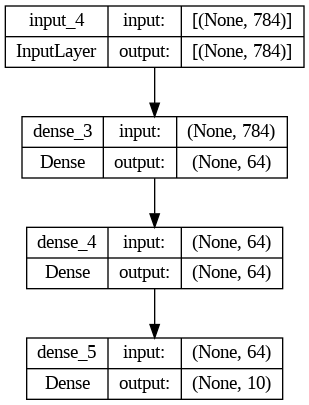

In [ ]:
keras.utils.plot_model(model, "first_model.png", show_shapes=True)

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype("float32")/255
x_test = x_test.reshape(10000, 784).astype("float32")/255


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.RMSprop(),
    metrics= [keras.metrics.SparseCategoricalAccuracy()]
)


In [ ]:
hist = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.3)


Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


657/657 [==============================] - 5s 7ms/step - loss: 0.3580 - sparse_categorical_accuracy: 0.8989 - val_loss: 0.2398 - val_sparse_categorical_accuracy: 0.9302
Epoch 2/2
657/657 [==============================] - 3s 4ms/step - loss: 0.1680 - sparse_categorical_accuracy: 0.9508 - val_loss: 0.1612 - val_sparse_categorical_accuracy: 0.9514


In [ ]:
test_score = model.evaluate(x_test, y_test, verbose=2)
print("Loss score: {0}".format(test_score[0]))
print("test score: {0}".format(test_score[1]))

313/313 - 1s - loss: 0.1497 - sparse_categorical_accuracy: 0.9540 - 586ms/epoch - 2ms/step
Loss score: 0.1497107744216919
test score: 0.9539999961853027
